In [45]:
!pip install yfinance

In [46]:
import yfinance as yf
import pandas as pd


In [47]:
dados = pd.read_csv('/content/statusinvest-busca-avancada.csv', delimiter=';', decimal=',', thousands=".")

In [48]:
len(dados)

597

In [49]:
dados = dados.fillna(0)

In [50]:
dados

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,14.20,0.00,57.07,1.39,0.64,28.22,10.90,2.63,13.75,18.41,4.66,0.47,1.50,16.88,-0.82,1.20,2.43,1.12,5.10,0.46,0.53,0.43,5.83,0.00,1.328659e+07,10.25,0.25,-0.42,1.679758e+09
1,ABCB4,15.75,6.36,8.09,0.80,0.08,64.72,51.16,28.90,4.57,4.57,0.00,0.00,2.34,1.15,-0.09,2.41,9.87,1.00,0.00,0.10,0.90,0.03,1.17,2.52,1.656704e+07,19.72,1.95,0.60,3.560919e+09
2,ABEV3,14.93,3.28,16.13,2.98,1.89,52.59,28.38,21.91,12.45,11.84,-0.61,-0.15,3.53,60.04,-2.56,1.14,18.47,11.71,19.69,0.63,0.36,0.53,4.56,3.24,3.738081e+08,5.01,0.93,0.25,2.350199e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,-5.69,0.00,0.00,770.90,-1.43,-116.16,0.00,-31.47,-2571.90,22.61,-81.72,82.72,0.14,0.00,0.00,9.420144e+04,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,7.71,0.00,51.89,5.87,2.40,10.44,8.04,4.18,26.97,29.88,2.91,0.63,2.17,6.17,-6.25,2.73,11.30,4.63,10.16,0.41,0.59,1.11,0.00,0.00,2.365792e+07,1.31,0.15,13.09,5.907506e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,WIZS3,10.60,5.74,7.03,4.08,1.69,72.28,42.97,25.97,4.25,3.53,-0.72,-0.70,1.83,28.35,-2.86,1.17,58.08,24.02,63.72,0.41,0.57,0.92,17.16,19.97,4.813494e+07,2.60,1.51,0.28,1.695017e+09
593,WLMM3,37.50,1.52,14.81,2.66,2.13,13.56,8.09,5.87,10.74,9.31,-0.89,-0.22,0.87,5.76,-4.11,4.29,17.97,14.39,16.73,0.80,0.20,2.45,14.81,87.64,1.767346e+04,14.09,2.53,0.21,1.296296e+09
594,WLMM4,34.01,1.85,13.43,2.41,1.93,13.56,8.09,5.87,9.74,9.31,-0.89,-0.22,0.79,5.23,-3.73,4.29,17.97,14.39,16.73,0.80,0.20,2.45,14.81,87.64,7.116206e+04,14.09,2.53,0.19,1.296296e+09
595,WSON33,67.00,7.11,18.67,2.27,0.93,52.58,25.20,13.21,9.79,14.46,4.67,1.08,2.47,31.02,-1.08,1.26,12.17,4.96,7.71,0.41,0.59,0.38,1.54,19.99,1.628329e+06,29.49,3.59,0.06,4.881617e+09


In [51]:
resultado = dados[dados['DY'] > 6]
resultado.sort_values(by=['DY'], ascending=False).head(30)

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
25,APTI3,197.64,239.54,0.05,0.01,0.01,79.07,324.02,292.25,0.05,0.59,0.02,0.01,0.15,0.05,-0.01,2.29,27.09,14.75,22.80,0.54,0.45,0.05,-22.74,86.58,0.000000e+00,13930.63,3773.54,0.00,4.444275e+07
132,CEBR6,21.95,95.03,0.96,0.85,0.73,-7.88,-212.61,-184.88,0.83,0.06,-0.74,-0.75,0.00,1.00,-3.00,25.71,88.42,76.37,61.87,0.86,0.04,-0.41,-36.10,130.50,6.730561e+05,25.98,22.97,0.00,1.522929e+09
130,CEBR3,20.30,93.42,0.88,0.78,0.67,-7.88,-212.61,-184.88,0.77,0.06,-0.74,-0.75,0.00,0.93,-2.77,25.71,88.42,76.37,61.87,0.86,0.04,-0.41,-36.10,130.50,2.934799e+05,25.98,22.97,0.00,1.522929e+09
131,CEBR5,22.00,86.20,0.96,0.85,0.73,-7.88,-212.61,-184.88,0.83,0.06,-0.74,-0.75,0.00,1.01,-3.00,25.71,88.42,76.37,61.87,0.86,0.04,-0.41,-36.10,130.50,2.505674e+05,25.98,22.97,0.00,1.522929e+09
433,PEAB3,64.00,47.41,1.60,1.42,1.24,92.22,3112.42,2155.32,1.11,0.91,-0.34,-0.44,34.43,2.80,-2.33,18.27,88.86,77.63,81.32,0.87,0.13,0.04,-8.83,81.97,2.941738e+04,45.10,40.07,0.00,9.273403e+08
434,PEAB4,80.33,41.55,2.00,1.78,1.56,92.22,3112.42,2155.32,1.39,0.91,-0.34,-0.44,43.21,3.51,-2.93,18.27,88.86,77.63,81.32,0.87,0.13,0.04,-8.83,81.97,1.377667e+04,45.10,40.07,0.00,9.273403e+08
232,EMAE3,25.35,30.82,3.64,1.21,0.62,47.99,36.04,53.73,5.43,10.43,-1.56,-0.35,1.96,2.39,-0.93,4.26,33.18,16.92,10.79,0.51,0.49,0.31,17.64,33.87,0.000000e+00,20.97,6.96,0.02,2.067155e+09
169,CPLE3,5.62,24.46,4.37,0.76,0.32,24.81,20.66,17.40,3.68,5.90,1.95,0.40,0.76,50.51,-0.41,1.03,17.45,7.43,11.29,0.43,0.57,0.43,4.51,24.16,1.963673e+07,7.37,1.29,-0.68,1.649047e+10
171,CPLE6,6.23,24.28,4.84,0.85,0.36,24.81,20.66,17.40,4.08,5.90,1.95,0.40,0.84,55.99,-0.46,1.03,17.45,7.43,11.29,0.43,0.57,0.43,4.51,24.16,1.184677e+08,7.37,1.29,-0.76,1.649047e+10
521,SOND6,35.51,23.99,20.86,1.59,1.10,30.14,5.71,6.15,22.46,18.82,-5.45,-0.39,1.28,3.65,-2.11,2.74,7.62,5.30,3.07,0.69,0.30,0.86,-10.40,0.00,1.430300e+04,22.34,1.70,-0.26,9.432226e+07


In [52]:
sa = yf.Ticker('abev3.sa')
hist = sa.history(start='2020-01-01')

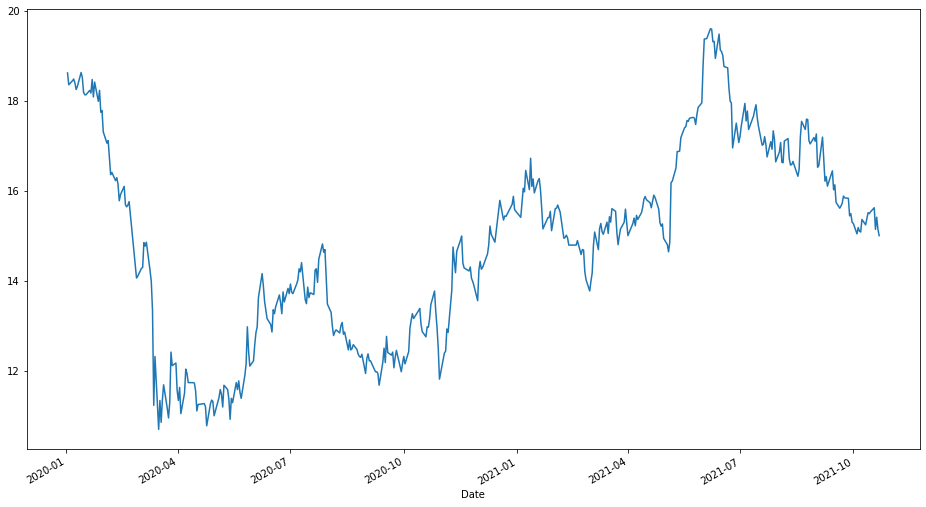

In [53]:
hist['Close'].plot(figsize=(16,9))

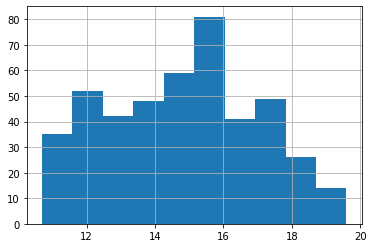

In [54]:
hist['Close'].hist()

In [55]:
sa1 = yf.Ticker('tiet3.sa')
hist1 = sa1.history(period='1d')

- TIET3.SA: No data found, symbol may be delisted


In [56]:
def verificarTicket(ticket):
  acao = yf.Ticker(ticket + '.sa')
  hist = acao.history(period='1d')
  
  if(len(hist)>0):
    return ticket
  else:
    return 0

In [57]:
parteDados = dados.tail(50)

In [58]:
#computar a lista inteira demora ~5min
listaTickets = []

#for tic in parteDados['TICKER']:
for tic in dados['TICKER']:
  ticketVerificado = verificarTicket(tic)
  if(not ticketVerificado == 0):
    listaTickets.append(ticketVerificado)


- APTI3.SA: No data found, symbol may be delisted
- APTI4.SA: No data found, symbol may be delisted
- BBML3.SA: No data found, symbol may be delisted
- BFRE11.SA: No data found for this date range, symbol may be delisted
- BFRE12.SA: No data found, symbol may be delisted
- BPAR3.SA: No data found, symbol may be delisted
- BPAT33.SA: No data found, symbol may be delisted
- BRBI3.SA: No data found, symbol may be delisted
- BRBI4.SA: No data found, symbol may be delisted
- BRGE7.SA: No data found, symbol may be delisted
- BRQB3.SA: No data found for this date range, symbol may be delisted
- BSEV3.SA: No data found, symbol may be delisted
- BTTL4.SA: No data found for this date range, symbol may be delisted
- CAMB4.SA: No data found for this date range, symbol may be delisted
- CATA3.SA: No data found, symbol may be delisted
- CATA4.SA: No data found, symbol may be delisted
- CCXC3.SA: No data found, symbol may be delisted
- CEEB6.SA: No data found, symbol may be delisted
- CMSA3.SA: No da

In [59]:
listaTickets

['AALR3',
 'ABCB4',
 'ABEV3',
 'ADHM3',
 'AERI3',
 'AESB3',
 'AFLT3',
 'AGRO3',
 'AGXY3',
 'AHEB3',
 'AHEB5',
 'AHEB6',
 'ALLD3',
 'ALPA3',
 'ALPA4',
 'ALPK3',
 'ALSO3',
 'ALUP11',
 'ALUP3',
 'ALUP4',
 'AMAR3',
 'AMBP3',
 'AMER3',
 'ANIM3',
 'APER3',
 'ARML3',
 'ARZZ3',
 'ASAI3',
 'ATMP3',
 'ATOM3',
 'AURA33',
 'AVLL3',
 'AZEV3',
 'AZEV4',
 'AZUL4',
 'B3SA3',
 'BAHI3',
 'BALM3',
 'BALM4',
 'BAUH4',
 'BAZA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBRK3',
 'BBSE3',
 'BDLL3',
 'BDLL4',
 'BEEF3',
 'BEES3',
 'BEES4',
 'BGIP3',
 'BGIP4',
 'BIDI11',
 'BIDI3',
 'BIDI4',
 'BIOM3',
 'BKBR3',
 'BLAU3',
 'BLUT3',
 'BLUT4',
 'BMEB3',
 'BMEB4',
 'BMGB4',
 'BMIN3',
 'BMIN4',
 'BMKS3',
 'BMOB3',
 'BNBR3',
 'BOAS3',
 'BOBR3',
 'BOBR4',
 'BPAC11',
 'BPAC3',
 'BPAC5',
 'BPAN4',
 'BPHA3',
 'BRAP3',
 'BRAP4',
 'BRBI11',
 'BRDT3',
 'BRFS3',
 'BRGE11',
 'BRGE12',
 'BRGE3',
 'BRGE5',
 'BRGE6',
 'BRGE8',
 'BRIT3',
 'BRIV3',
 'BRIV4',
 'BRKM3',
 'BRKM5',
 'BRKM6',
 'BRML3',
 'BRPR3',
 'BRSR3',
 'BRSR5',
 'BRSR6',
 'B

In [60]:
len(listaTickets)

518

In [61]:
len(dados)

597

In [62]:
parteDados = dados[dados['TICKER'].isin(listaTickets)]

In [63]:
#empresas que sobraram ativas na bolsa de valores atualmente
parteDados

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,14.20,0.00,57.07,1.39,0.64,28.22,10.90,2.63,13.75,18.41,4.66,0.47,1.50,16.88,-0.82,1.20,2.43,1.12,5.10,0.46,0.53,0.43,5.83,0.00,1.328659e+07,10.25,0.25,-0.42,1.679758e+09
1,ABCB4,15.75,6.36,8.09,0.80,0.08,64.72,51.16,28.90,4.57,4.57,0.00,0.00,2.34,1.15,-0.09,2.41,9.87,1.00,0.00,0.10,0.90,0.03,1.17,2.52,1.656704e+07,19.72,1.95,0.60,3.560919e+09
2,ABEV3,14.93,3.28,16.13,2.98,1.89,52.59,28.38,21.91,12.45,11.84,-0.61,-0.15,3.53,60.04,-2.56,1.14,18.47,11.71,19.69,0.63,0.36,0.53,4.56,3.24,3.738081e+08,5.01,0.93,0.25,2.350199e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,-5.69,0.00,0.00,770.90,-1.43,-116.16,0.00,-31.47,-2571.90,22.61,-81.72,82.72,0.14,0.00,0.00,9.420144e+04,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,7.71,0.00,51.89,5.87,2.40,10.44,8.04,4.18,26.97,29.88,2.91,0.63,2.17,6.17,-6.25,2.73,11.30,4.63,10.16,0.41,0.59,1.11,0.00,0.00,2.365792e+07,1.31,0.15,13.09,5.907506e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,WIZS3,10.60,5.74,7.03,4.08,1.69,72.28,42.97,25.97,4.25,3.53,-0.72,-0.70,1.83,28.35,-2.86,1.17,58.08,24.02,63.72,0.41,0.57,0.92,17.16,19.97,4.813494e+07,2.60,1.51,0.28,1.695017e+09
593,WLMM3,37.50,1.52,14.81,2.66,2.13,13.56,8.09,5.87,10.74,9.31,-0.89,-0.22,0.87,5.76,-4.11,4.29,17.97,14.39,16.73,0.80,0.20,2.45,14.81,87.64,1.767346e+04,14.09,2.53,0.21,1.296296e+09
594,WLMM4,34.01,1.85,13.43,2.41,1.93,13.56,8.09,5.87,9.74,9.31,-0.89,-0.22,0.79,5.23,-3.73,4.29,17.97,14.39,16.73,0.80,0.20,2.45,14.81,87.64,7.116206e+04,14.09,2.53,0.19,1.296296e+09
595,WSON33,67.00,7.11,18.67,2.27,0.93,52.58,25.20,13.21,9.79,14.46,4.67,1.08,2.47,31.02,-1.08,1.26,12.17,4.96,7.71,0.41,0.59,0.38,1.54,19.99,1.628329e+06,29.49,3.59,0.06,4.881617e+09


**Começarremos a parte de calcular a variação da cotação desde o fundo de 2020**

In [64]:
sa = yf.Ticker('bbas3.sa')
hist = sa.history(start='2020-01-01')

In [65]:
#pegar a linha com a menor cotação desde o início da pandemia
menor = hist[(hist['Close'] == hist['Close'].min()) & (hist.index.year == 2020)]


In [66]:
len(menor)

1

In [67]:
menor = menor['Close'][0]

In [68]:
menor

20.409282684326172

In [69]:
atual = hist['Close'][-1]
# ou
# hist.tail(1)['Close'][0]


In [70]:
#calcular variação percentual
(atual - menor)/menor * 100

41.65122946537597

In [71]:
def calcularVariacaoFundo(ticket):
  
  sa = yf.Ticker(ticket + '.sa')
  hist = sa.history(start='2020-01-01') 

  menor = hist[(hist['Close'] == hist['Close'].min()) & (hist.index.year == 2020)]

  if(len(menor) == 0):
    return 0
  else:
    
    menor = menor['Close'][0]
    atual = hist['Close'][-1]
    variacao = (atual - menor)/menor * 100

    return  float("{:.2f}".format(variacao))


In [72]:
calcularVariacaoFundo('itub4')

18.37

In [73]:
parteDados.drop( columns=[  'PRECO', 'P/ATIVOS', 'MARGEM BRUTA',
       'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 
       'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO',
       'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROA', 'ROIC',
       'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS',
       'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA',
       ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
parteDados.columns

Index(['TICKER', 'DY', 'P/L', 'P/VP', 'EV/EBIT', 'ROE'], dtype='object')

In [75]:
parteDados

,TICKER,DY,P/L,P/VP,EV/EBIT,ROE
0,AALR3,0.00,57.07,1.39,18.41,2.43
1,ABCB4,6.36,8.09,0.80,4.57,9.87
2,ABEV3,3.28,16.13,2.98,11.84,18.47
3,ADHM3,0.00,-4.09,-1.29,-5.69,-31.47
4,AERI3,0.00,51.89,5.87,29.88,11.30
...,...,...,...,...,...,...
592,WIZS3,5.74,7.03,4.08,3.53,58.08
593,WLMM3,1.52,14.81,2.66,9.31,17.97
594,WLMM4,1.85,13.43,2.41,9.31,17.97
595,WSON33,7.11,18.67,2.27,14.46,12.17


In [76]:
parteDados.loc[:, 'variacaoFundo'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [77]:
parteDados.columns

Index(['TICKER', 'DY', 'P/L', 'P/VP', 'EV/EBIT', 'ROE', 'variacaoFundo'], dtype='object')

In [78]:
parteDados

,TICKER,DY,P/L,P/VP,EV/EBIT,ROE,variacaoFundo
0,AALR3,0.00,57.07,1.39,18.41,2.43,0
1,ABCB4,6.36,8.09,0.80,4.57,9.87,0
2,ABEV3,3.28,16.13,2.98,11.84,18.47,0
3,ADHM3,0.00,-4.09,-1.29,-5.69,-31.47,0
4,AERI3,0.00,51.89,5.87,29.88,11.30,0
...,...,...,...,...,...,...,...
592,WIZS3,5.74,7.03,4.08,3.53,58.08,0
593,WLMM3,1.52,14.81,2.66,9.31,17.97,0
594,WLMM4,1.85,13.43,2.41,9.31,17.97,0
595,WSON33,7.11,18.67,2.27,14.46,12.17,0


In [ ]:
for name in parteDados['TICKER']:
  retorno = calcularVariacaoFundo(name)
  parteDados.loc[ (parteDados['TICKER'] == name), 'variacaoFundo'] = retorno

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

KeyboardInterrupt: ignored

In [ ]:
parteDados.sort_values(by=['variacaoFundo'], ascending=False)

In [ ]:
#eliminar as variações com valores iguais a zero
parteDados.drop(parteDados[parteDados['variacaoFundo'] == 0].index , inplace=True)

**Iniciaremos a tarefa de agrupamento de dados (CLUSTERING)** : 1-preparação

PRÓXIMO ENCONTRO